In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [2]:
x,y = mnist['data'], mnist['target']

In [3]:
x.shape

(70000, 784)

In [4]:
y.shape

(70000,)

9


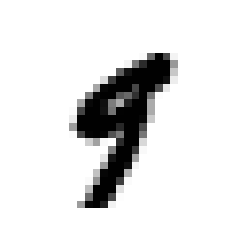

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

some_digit = x[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
print(y[36000])

In [6]:
p_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
num_indices = []
for i in range(len(y)):
    if int( y[i]) in p_list:
        pop = p_list.index(int(y[i]))
        p_list.pop(pop)
        num_indices.append(i)
num_indices

[0, 1, 2, 3, 4, 5, 7, 13, 15, 17]

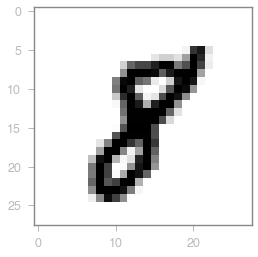

In [7]:
for i in range(len(num_indices)):
    some_digit = x[num_indices[i]]
    some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

In [8]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [10]:
np.unique(y_train)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [11]:
np.unique(y_test)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

## sample classifier

In [12]:
train_5 = np.where(y_train==5)
test_5 = np.where(y_test==5)

In [13]:
a = np.array([1,2,3])
b = np.where(a==2)
b
type(y)

numpy.ndarray

In [14]:
test_5 = np.where(y==5)
test_5

(array([], dtype=int64),)

In [15]:
y_train_5 = y[train_5]

In [16]:
np.unique(y_train_5)

array([], dtype=object)

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state =42)
sgd_clf.fit(x_train, y_train_5)

ValueError: Found input variables with inconsistent numbers of samples: [60000, 0]

In [ ]:
np.unique(y_train_5)

In [ ]:
num_indices
for i in range(len(num_indices)):
    print(y[num_indices[i]])
    print()

## testing

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([x_train[23]])

array(['3'], dtype='<U1')

In [20]:
y_train[23]

'3'

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(x_train, y_train):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = y_train[train_index]
    x_test_folds = x_train[test_index]
    y_test_folds = y_train[test_index]
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/ len(y_pred))

0.88035
0.86395
0.85375


In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.88035, 0.86395, 0.85375])

Accuracy not better measuring way for a classifier as dataset must have in proportionate of classes and models tries to learn badly and generalizes it which may feed to giving more accuracy but in general its a bad performing model

In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = sgd_clf.predict(x_train)
y_pred1 = cross_val_predict(sgd_clf, x_train, y_train, cv=5)
confusion_matrix(y_pred, y_train)
confusion_matrix(y_pred1, y_train)

array([[5618,    2,   40,   23,   11,   78,   42,   18,   36,   14],
       [   1, 6276,   52,   15,   17,   11,    6,   17,   65,   17],
       [  44,   78, 5148,  207,   56,   78,   82,  104,  129,   42],
       [  27,   66,  133, 5227,   43,  455,    9,   62,  371,  147],
       [   9,    7,   56,   12, 5054,   72,   21,   70,   35,  170],
       [  51,   24,   39,  237,   26, 4024,   76,   22,  196,   64],
       [  70,   21,  122,   39,   64,  174, 5620,    7,   66,    7],
       [   4,   19,   61,   47,   60,   18,    2, 5503,   16,  292],
       [  73,  220,  289,  227,  177,  368,   55,   78, 4741,  203],
       [  26,   29,   18,   97,  334,  143,    5,  384,  196, 4993]])

#notes
perfect classifier has only true  positive and true negatives

confusion matrix =                   1   |   0
                1:   1000(T.P)           |      0 (F.P)
                0:      0(F.N)           |    1000 (T.N)
                     
T.P = True Positive
F.P = False Positive
F.N = False Negative
T.N = True Negative

In [24]:
#notes
accuracy of positive predictions
precision of the classifier = true positive / (true positive + false positive)
accuracy of the classifier

SyntaxError: invalid syntax (<ipython-input-24-14094a434e26>, line 2)

In [ ]:
#notes
ratio of positive instances that are correctly detected by the classifier
recall or sensicity or true positive rate (TPR) 

recall = true positive / (true positive + false negative)

In [ ]:
#notes
increasing precision reduces recall vice versa - precision recall trade off

In [25]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train, y_pred, average='micro'))
print(recall_score(y_train, y_pred, average = 'micro'))

0.8632
0.8632


In [ ]:
#notes
#harmonic mean of precision and recall
f1_score = 2 * (precision * recall)/(precision + recall)
     
         = (True positive)/(true positive + (false negative + false positive)/2)

In [26]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8632

In [27]:
np.unique(y_pred)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [ ]:
#notes

sklearns decision_function gives score for each instance which can be used a threshold if the scores are greater than the threshold
it will show True


precision increases when we make the threshold up and recall decreases
 
you can select the threshold value that gives best precision recall trade off

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method = 'decision_function')

print(y_scores)

precision, recall, threshold = precision_recall_curve(y_train, y_scores)


def plot_precision_recall_vs_threshold(precision, recall, threshold):
    plt.plot(threshold, precision, "b--", label = 'precision')
    plt.plot(threshold, recall, "g--", label = 'recall')
    plt.xlabel("threshold")
    plt.legend(loc='upper left')
    plt.ylim([0, 1])
    

plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.show()

[[-71561.35915216  11830.09413397 -11698.27202739 ... -10943.82661942
   -6332.80305021  -3300.93433223]
 [-64147.08697547 -39147.1268494  -41989.08587355 ...    972.29679311
  -14779.01884214  -5393.0552387 ]
 [-87909.37304124 -18797.6564369  -16301.11886773 ... -12209.68272455
   -3500.22666398   3358.22907647]
 ...
 [-18658.14259338 -24344.59066221 -22138.15203295 ...   6304.92378578
   -3675.31056152  -3587.9908854 ]
 [ -8353.8082236    -493.14059486   2755.11130527 ... -55941.70888299
   -1197.96714759 -28004.38618262]
 [-16489.88844163   -808.94336551 -12691.22678432 ... -25491.53914354
   -6683.62047772 -26559.19555695]]


ValueError: multiclass format is not supported

## The roc curve

In [ ]:
receiver operating charecteristic (ROC) for binary classifier 

In [ ]:
#notes 
roc = true positive rate/ false positive rate
    = (tp/tp+fn)/ 
    
#read again ROc, specificity , roc-aoc curve
roc - plots sensitivity (recall) vs 1-specificity

In [ ]:
Svm and linear classifier are binaryu classifiers

## multilabel classlifaction

In [ ]:
# using binary classifiers to for multiclass classication
# one versus all or one versus the rest(OVA) - select class which classifiers outputs the highest score
# one versus one strategy (ovo) (n*(n-1))/2 eg: for 0-9 classifier, we need 45 classifiers to see which class wins most duals


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf1 = SGDClassifier()
sgd_clf1.fit(x_train, y_train)

In [ ]:
score = sgd_clf1.predict(x_train[300])
score

In [ ]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
X

In [ ]:
y

In [ ]:
shap.force_plot(explainer.expected_value, shap_values, X)